# USED CAR SALES

Muh Amri Sidiq

## Introduction


The used car market is a dynamic and competitive industry influenced by various factors such as consumer preferences, economic conditions, and dealership strategies. Understanding sales patterns and key performance drivers is crucial for optimizing pricing strategies, improving sales efficiency, and enhancing customer satisfaction.

This study focuses on four key areas:

1. Analyzing Sales Trends and Performance Over Time
    By examining historical sales data, we aim to identify seasonal trends, fluctuations in demand, and external factors influencing sales performance. This helps businesses anticipate market changes and adjust their strategies accordingly.

2. Exploring Relationships Between Car Features, Pricing, and Sales Margins
    Car features such as brand, model, mileage, fuel type, and condition play a significant role in determining pricing and profitability. This research investigates how these attributes impact sales margins and customer purchasing behavior.

3. Developing Machine Learning Models to Predict Sales Status
    Machine learning techniques can help forecast whether a vehicle will sell quickly or remain in inventory for an extended period. 

4. Studying the Impact of Distributor Strategies and Sales Agent Performance
    The role of distributors and sales agents is critical in influencing customer decisions. By analyzing their performance and strategies, we can determine best practices that contribute to higher sales success and customer satisfaction.

By leveraging data analytics and machine learning, this study aims to provide actionable insights that enhance decision-making in the used car sales industry, ultimately leading to improved sales outcomes and competitive advantages.

## Import Library

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.over_sampling import SMOTE

## Load data

In [23]:
df = pd.read_csv("used_car_sales.csv")

check preview data use Head

In [24]:
df.head()

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Purchased Date,Car Sale Status,Sold Date,Purchased Price-$,Sold Price-$,Margin-%,Sales Agent Name,Sales Rating,Sales Commission-$,Feedback
0,O2KE17,Carmudi,California,Fortuner,Toyota,SUV,Gray,Automatic,8,5,...,2022-10-26,Un Sold,1970-01-01,8296,0,0,Pranav,1,0,Average
1,EPMPC8,Carousell,Philadelphia,Creta,Hyundai,Hatchback,Blue,Automatic,5,5,...,2017-08-25,Sold,2021-03-03,5659,4770,-16,Vihaan,5,0,Good
2,SQKXAP,Carsome,North Carolina,Scorpio,Mahindra,SUV,Gray,Automatic,5,5,...,2018-06-13,Un Sold,1970-01-01,8430,0,0,Aarush,4,0,Good
3,PWP2QK,Trivett,North Carolina,Plato,Prazo,Convertible,Gray,Automatic,2,2,...,2023-05-14,Sold,2024-04-02,6919,7942,15,Anushka,1,205,Average
4,FNDDKM,Zupps,Portland,Dzire,Maruti,Sedan,Red,Automatic,5,5,...,2022-08-24,Un Sold,1970-01-01,6864,0,0,Pavan,3,0,Poor


In [29]:
df["Location"].value_counts()

Location
North Carolina    1075
Tennessee          632
Detroit            605
Chicago            590
Denver             583
Columbus           575
Tucson             568
Texas              564
New York           564
Utah               549
California         546
San Jose           544
Philadelphia       540
Florida            531
Oklahoma           529
Portland           518
Madison            487
Name: count, dtype: int64

check struktur data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  10000 non-null  object
 1   Distributor Name    10000 non-null  object
 2   Location            10000 non-null  object
 3   Car Name            10000 non-null  object
 4   Manufacturer Name   10000 non-null  object
 5   Car Type            10000 non-null  object
 6   Color               10000 non-null  object
 7   Gearbox             10000 non-null  object
 8   Number of Seats     10000 non-null  int64 
 9   Number of Doors     10000 non-null  int64 
 10  Energy              10000 non-null  object
 11  Manufactured Year   10000 non-null  int64 
 12  Price-$             10000 non-null  int64 
 13  Mileage-KM          10000 non-null  int64 
 14  Engine Power-HP     10000 non-null  int64 
 15  Purchased Date      10000 non-null  object
 16  Car Sale Status     100

we have 10000 row and 25 column, explain data this bellow:

 - `ID`                     : Unique identifier for each record.
 - `Distributor Name`       : Name of the car distributor.
 - `Location`               : Location of the distributor’s office.
 - `Car Name`               : The specific name of the car.
 - `Manufacturer Name`      : Name of the car’s manufacturer.
 - `Car Type`               : Type of car (e.g., Sedan, SUV, Hatchback, etc.).
 - `Color`                  : Car’s color.
 - `Gearbox`                : Type of gearbox (e.g., Manual, Automatic).
 - `Number of Seats`        : Total number of seats in the car.
 - `Number of Doors`        : Number of doors in the car.
 - `Energy`                 : Fuel type used by the car (e.g., Petrol, Diesel, Electric).
 - `Manufactured Year`      : Year the car was manufactured.
 - `Price-$`                : Listed price of the car in USD.
 - `Mileage-KM`             : Total kilometers the car has traveled.
 - `Engine Power-HP`        : Horsepower (HP) of the car’s engine.
 - `Purchased Date`         : Date the distributor purchased the car.
 - `Car Sale Status`        : Indicates whether the car was sold to a customer (Sold/Not Sold).
 - `Sold Date`              : Date the car was sold to a customer.
 - `Purchased Price-$`      : Purchase price paid by the distributor.
 - `Sold Price-$`           : Sale price paid by the customer.
 - `Margin-%`               : Percentage margin earned by the distributor.
 - `Sales Agent Name`       : Name of the sales agent who closed the deal.
 - `Sales Rating`           : Rating given to the sales agent by the distributor.
 - `Sales Commission-$`     : Commission paid to the sales agent by the distributor.
 - `Feedback`               : Customer feedback on the sales experience.

Change type data

In [4]:
df['Purchased Date'] = pd.to_datetime(df['Purchased Date'])
df['Sold Date'] = pd.to_datetime(df['Sold Date'])

df['Purchased Year'] = df['Purchased Date'].dt.year
df['Purchased Month'] = df['Purchased Date'].dt.month
df['Purchased Day'] = df['Purchased Date'].dt.day

df['Sold Year'] = df['Sold Date'].dt.year
df['Sold Month'] = df['Sold Date'].dt.month
df['Sold Day'] = df['Sold Date'].dt.day

df[['Purchased Date', 'Purchased Year', 'Purchased Month', 'Purchased Day', 'Sold Date', 'Sold Year', 'Sold Month', 'Sold Day']].head()

,Purchased Date,Purchased Year,Purchased Month,Purchased Day,Sold Date,Sold Year,Sold Month,Sold Day
0,2022-10-26,2022,10,26,1970-01-01,1970,1,1
1,2017-08-25,2017,8,25,2021-03-03,2021,3,3
2,2018-06-13,2018,6,13,1970-01-01,1970,1,1
3,2023-05-14,2023,5,14,2024-04-02,2024,4,2
4,2022-08-24,2022,8,24,1970-01-01,1970,1,1


check distribution target

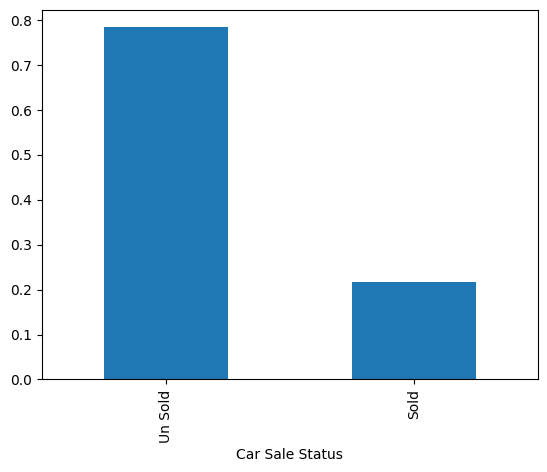

In [6]:
df['Car Sale Status'].value_counts(normalize=True).plot(kind='bar');

## Exploratory Data Analysis

EDA is a critical step in understanding the dataset. Using Python libraries like Pandas, Seaborn, and Matplotlib, we analyze distributions, identify patterns, and detect anomalies. Visualizations such as histograms, box plots, and heatmaps reveal relationships between features and the target variable, setting the stage for effective feature engineering and model building

In [5]:
df['Car Sale Status'].value_counts()

Car Sale Status
Un Sold    7834
Sold       2166
Name: count, dtype: int64

target not balance

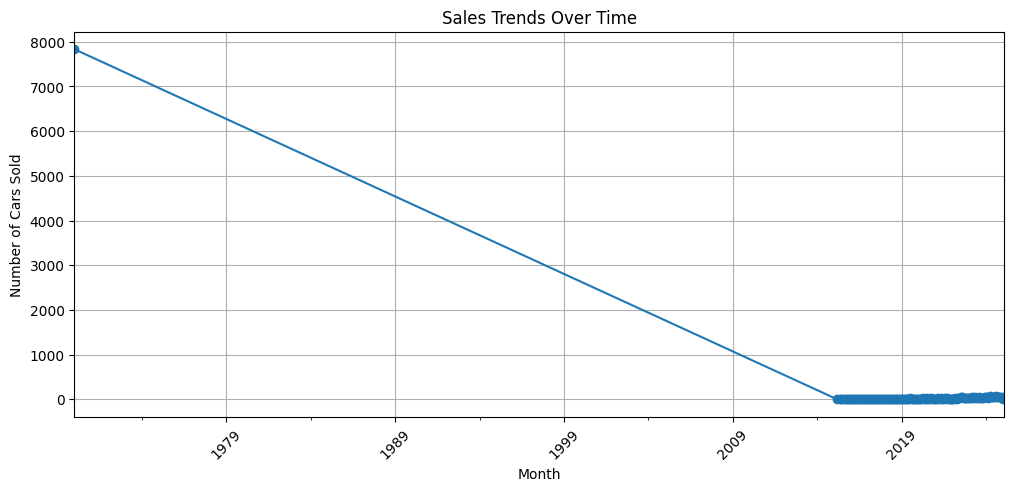

In [13]:
# Make sure format datetime
df['Sold Date'] = pd.to_datetime(df['Sold Date'])

# Agregation summary sold every month
df['Month'] = df['Sold Date'].dt.to_period('M')
sales_trend = df.groupby('Month').size()

# Plot sold
plt.figure(figsize=(12, 5))
sales_trend.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.title('Sales Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Insight: `Cars Sold` trend from high to low from start sold until 2019

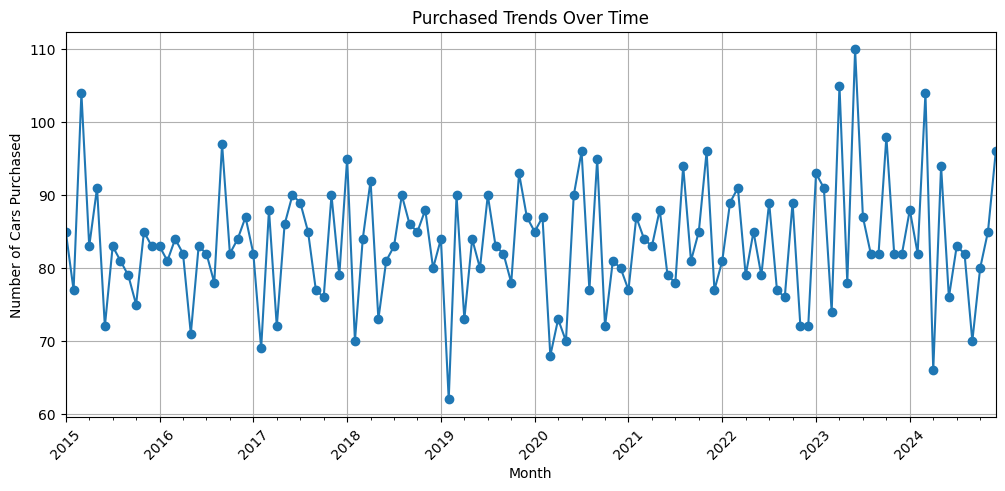

In [14]:
# Make sure format datetime
df['Purchased Date'] = pd.to_datetime(df['Purchased Date'])

# Agregation puchase evry month
df['Month'] = df['Purchased Date'].dt.to_period('M')
sales_trend = df.groupby('Month').size()

# Plot tren purchased
plt.figure(figsize=(12, 5))
sales_trend.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cars Purchased')
plt.title('Purchased Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Insight: Highest `Car Purchased` in 2023 Q2 in this case economic start to high demand, and lowes in 2019 Q1 in this year effect economic war china-us, weaknes global economic, change regulation emission and change to electric car.

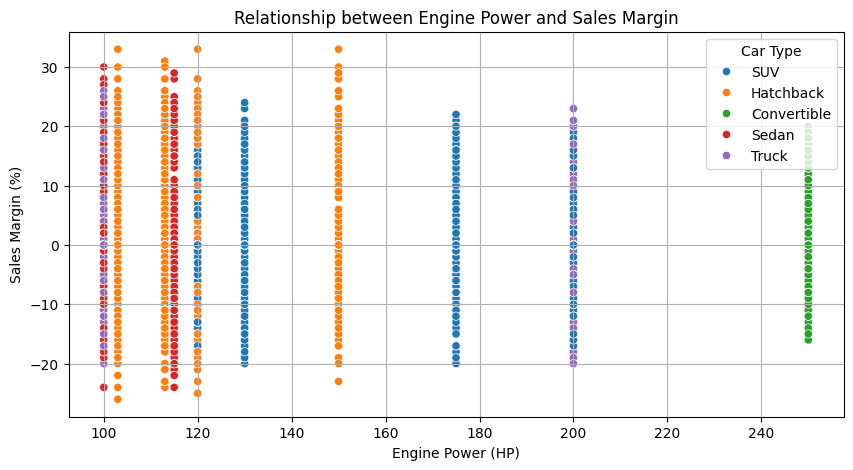

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Engine Power-HP'], y=df['Margin-%'], hue=df['Car Type'])
plt.xlabel('Engine Power (HP)')
plt.ylabel('Sales Margin (%)')
plt.title('Relationship between Engine Power and Sales Margin')
plt.grid(True)
plt.show()

Insight: `Sales Margin-(%)` above 30% with `Car Type` Hatchback use `Engine Power-(HP)` above 110 HP until 135 HP, but `Sales Margin-(%)` lowest -28% with `Car Type` Hatchback use engine power 110 HP

C:\Users\amris\AppData\Local\Temp\ipykernel_8768\2309026695.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales Agent Name', y='Sales Commission-$', hue='Sales Rating', data=df, ci=None, palette='coolwarm')


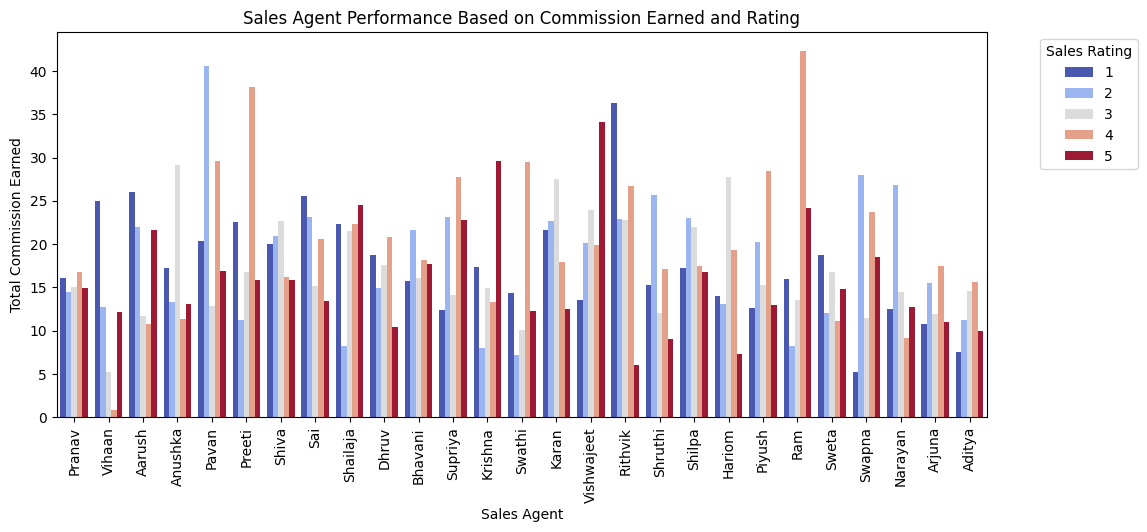

In [16]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Sales Agent Name', y='Sales Commission-$', hue='Sales Rating', data=df, ci=None, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Sales Agent')
plt.ylabel('Total Commission Earned')
plt.title('Sales Agent Performance Based on Commission Earned and Rating')
plt.legend(title='Sales Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Sales Comission-$` highest until 40$ with `Sales Agent Name` Ram with `Sales Ratings` is 4, `Sales Comission-$` lowest with 1$ with `Sales Agent Name` Vihaan `Sales Ratings` is 4, but for this same name `Sales Rating` 1 but have `Sales Comission-$` until 25$, `Sales Comission-$` until 35$ with `Sales Ratings` is 1 `Sales Agent Name` is Rithvik

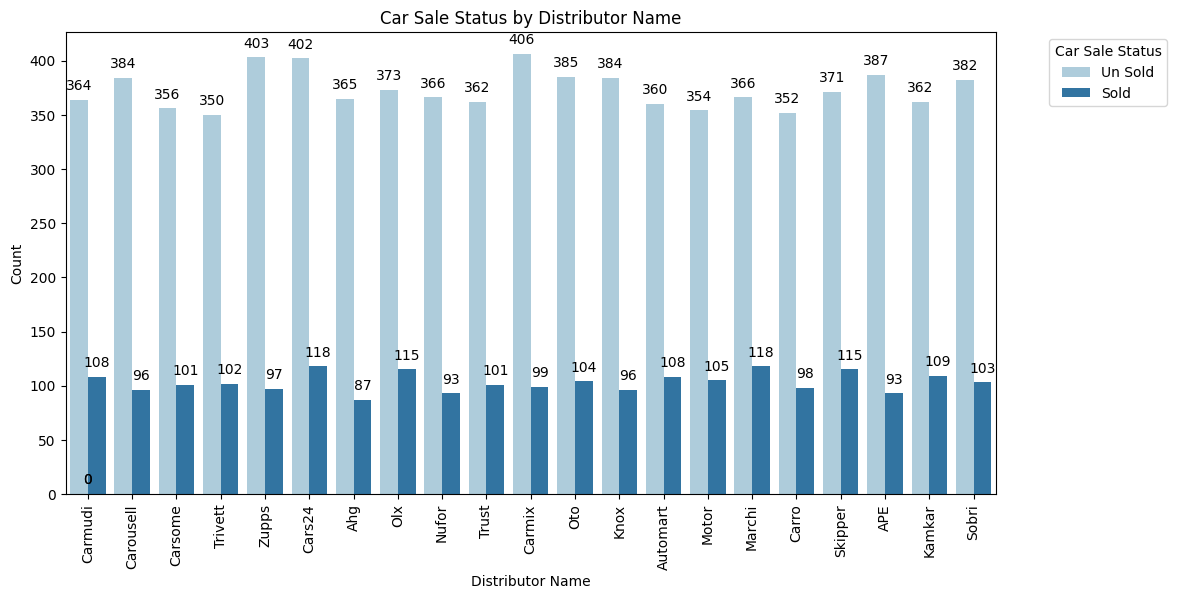

In [36]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Distributor Name', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=90)
plt.xlabel('Distributor Name')
plt.ylabel('Count')
plt.title('Car Sale Status by Distributor Name')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: Highest `Car Sales Status` with Un Sold `Distributor Name` is Zupps, Cars24 and Carmix, and lowest `Car sales Status` with Un Sold is Trivett and Carro. `Distributor Name` Cars 24 have biggest `Car Sales Status` sold and `Distributor Name` Ahg have lowest `Car Sales Status` Sold

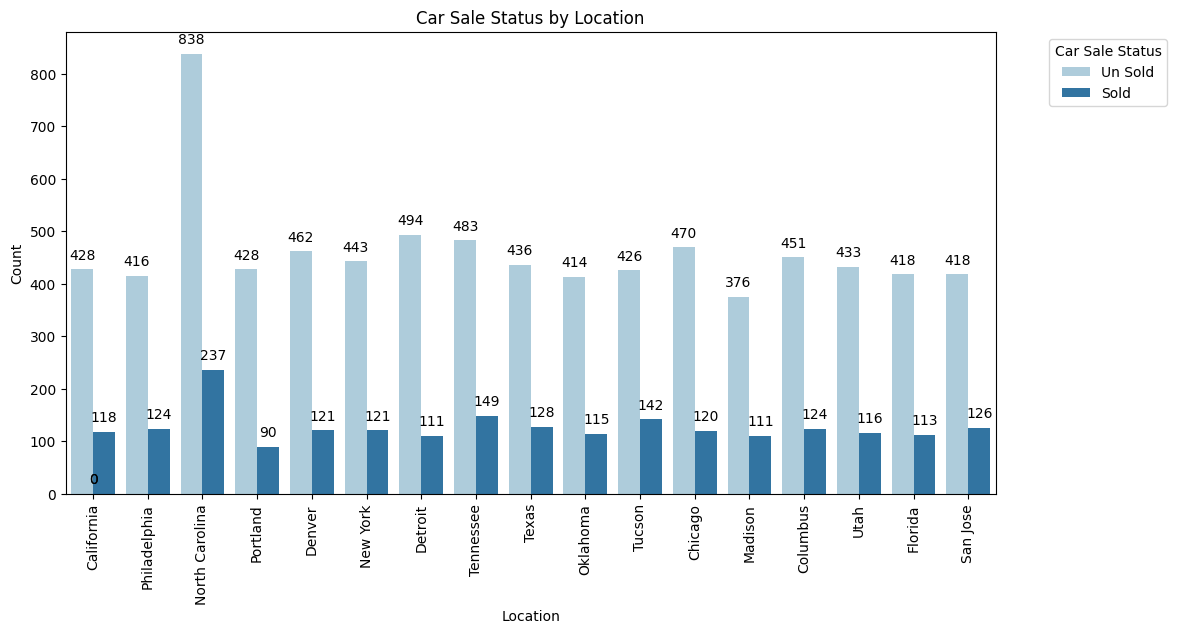

In [35]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Location', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Car Sale Status by Location')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Location` Nort Carolina have `Car Sale Status` with Un Sold and SOld Highest. `Location` portland have `Car Sale Status` lowest with Sold, and `Location` Madison have `Car Sales Status` Un Sold

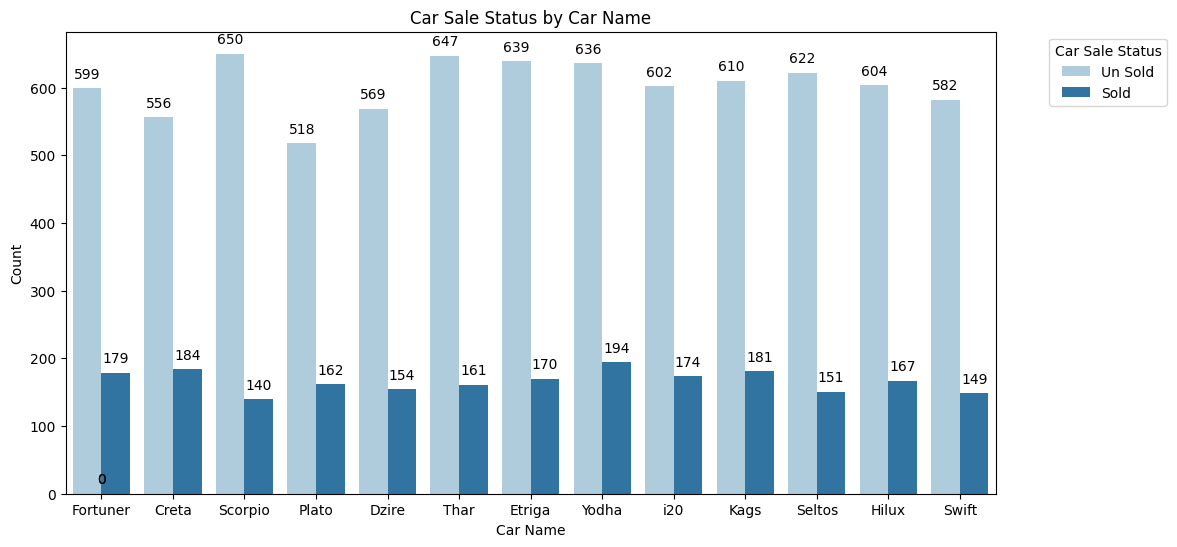

In [34]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Car Name', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Car Sale Status by Car Name')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Car Name` Scorpio have highest `Car Sale Status` Un Sold, and same `Car Name` have lowest `Car Sale Status` Sold. `Car Name` Plato have lowest `Car Sale Status` lowest, `Care Name` Creta and Yodha we can see have `Car Sale Status` Highest. 

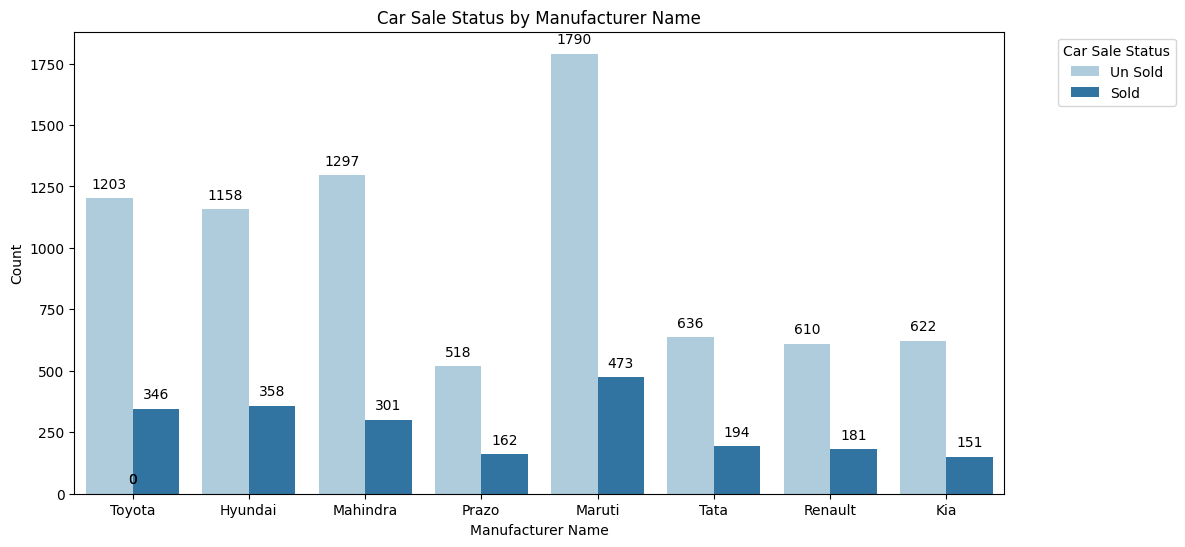

In [33]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Manufacturer Name', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Manufacturer Name')
plt.ylabel('Count')
plt.title('Car Sale Status by Manufacturer Name')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Manufacture Name` Maruti have `Car Sale Status` Un Sold and Sold Highest, and `Manufacture Name` Prazo have `Car Sale Status` lowest Un Sold and Sold.

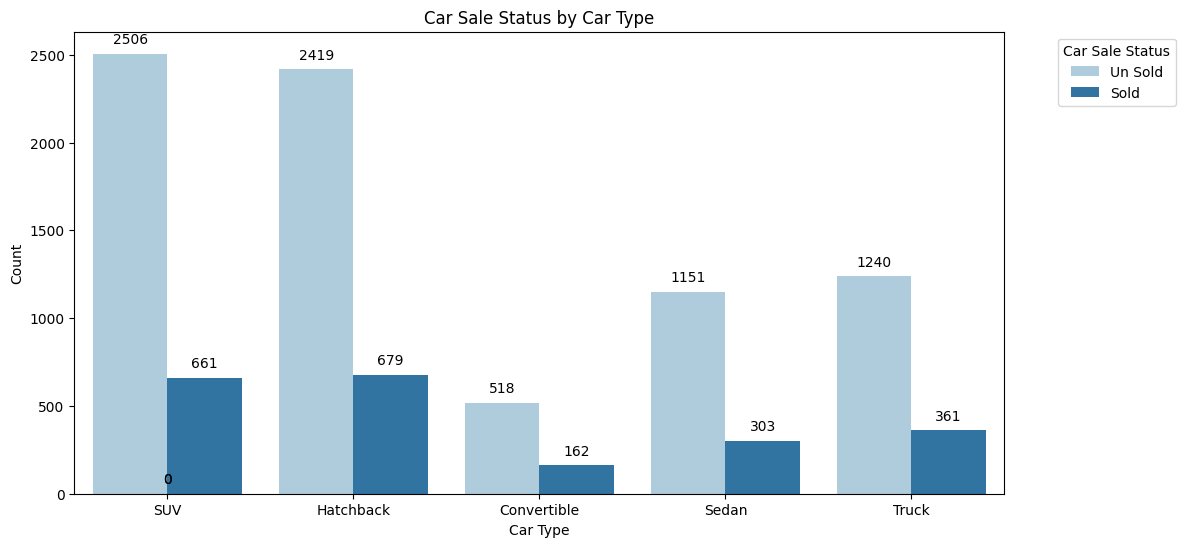

In [32]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Car Type', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.title('Car Sale Status by Car Type')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Car Type` Hatchback have highest `Car Sale Status` Sold, `Car Type` SUV have `Car Sale Status` Un Sold. `Car Type` Convertible have `Car Sale Status` lowest for Un Sold and Sold.

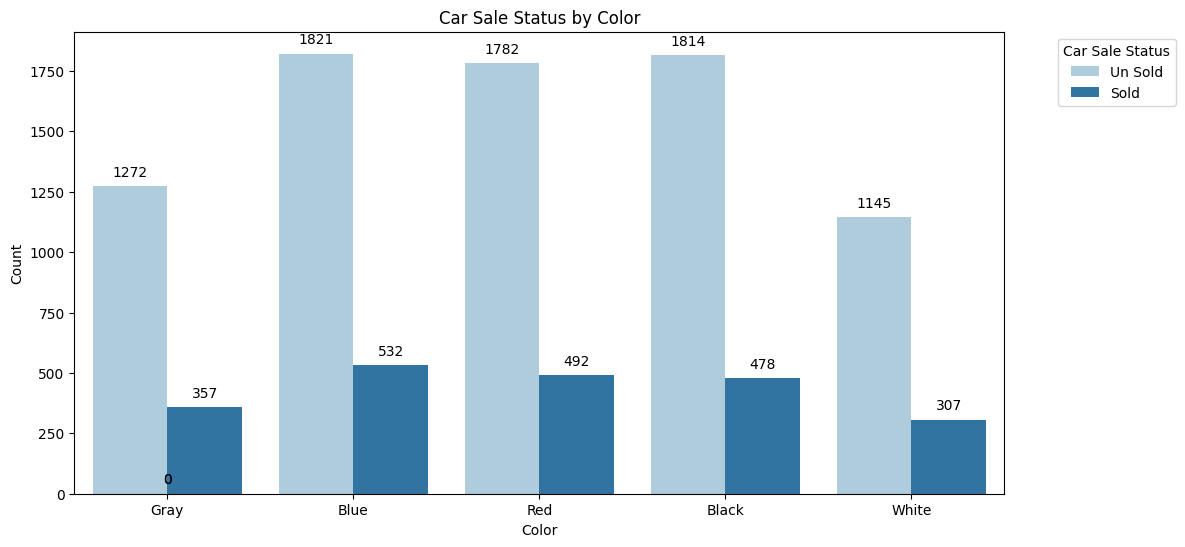

In [31]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Color', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Car Sale Status by Color')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Color` Blue have `Car Sale Status` Highest for Un Sold and Sold, `Color` White have lowest `Car Sale Status` for Un Sold and Sold

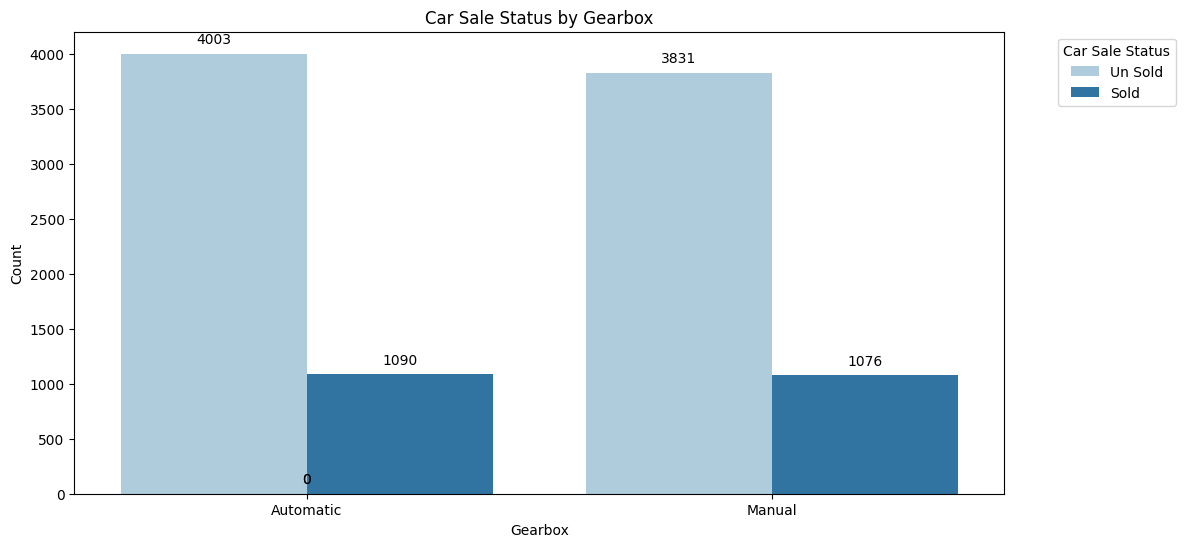

In [30]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Gearbox', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Gearbox')
plt.ylabel('Count')
plt.title('Car Sale Status by Gearbox')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Gearbox` Automatic and Manual have almost same `Car Sale Status` Sold, and `Gearbox` Automatic have `Car Sale Status`Un Sold Highest

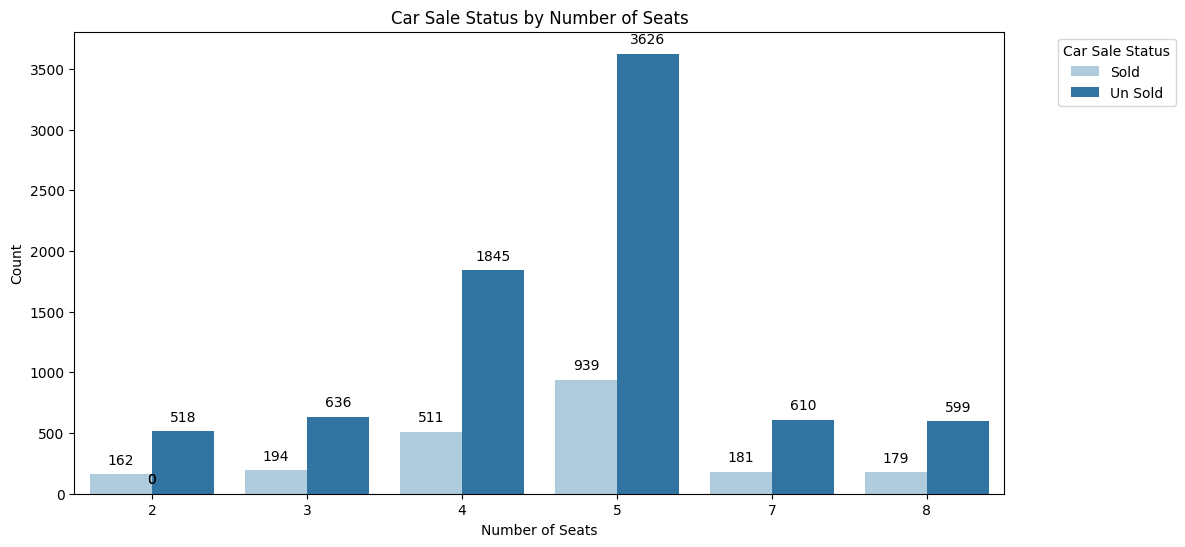

In [29]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Number of Seats', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.title('Car Sale Status by Number of Seats')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Number of Seats`5 have highest `Car Sale Status` sold and un Sold, `Number of Seats` 2 have lowest `Car Sale Status` Sold and un Sold

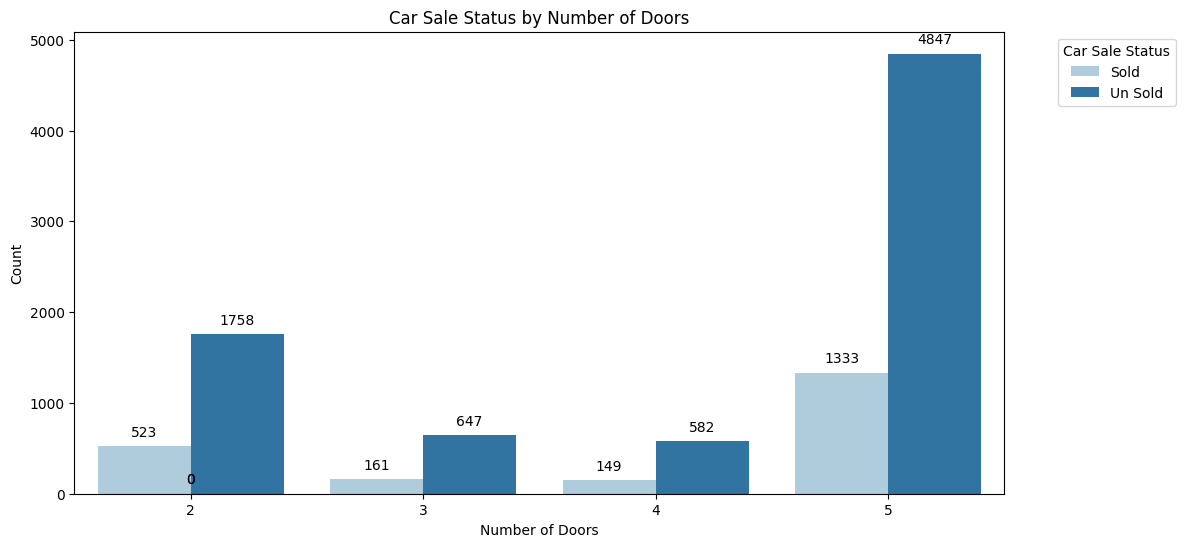

In [28]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Number of Doors', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.title('Car Sale Status by Number of Doors')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Number of Doors` 5 have `Car Sale Status` Sold and Un Sold highest, `Number of Doors` 3 have `Car Sale Status` Sold Lowest and `Number of Doors` 4 have `Car Sale Status` Un Sold Lowest

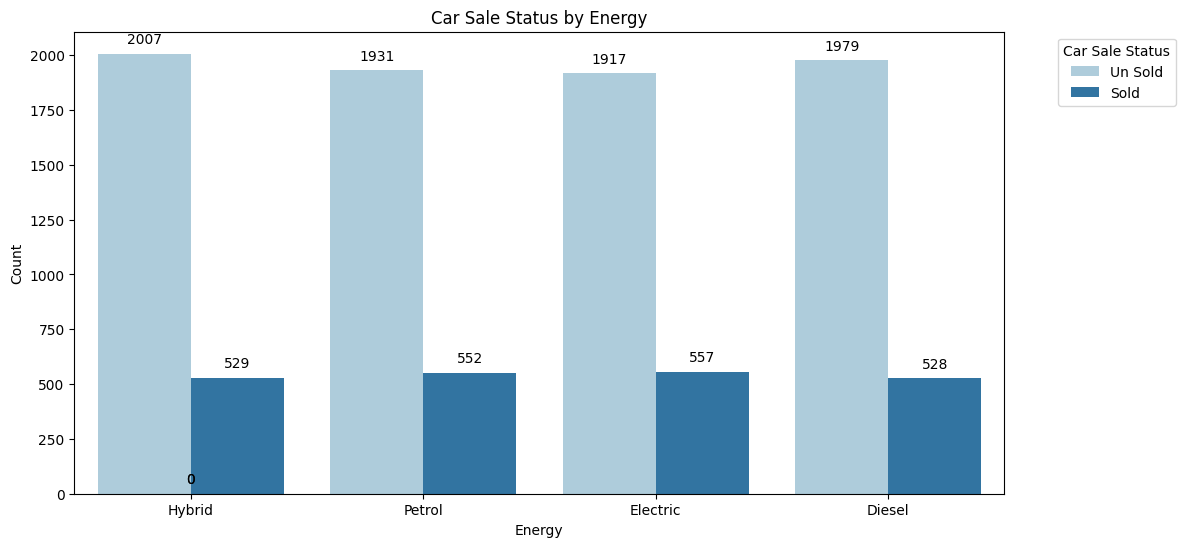

In [37]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Energy', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title('Car Sale Status by Energy')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Energy` type electric have highest `Car Sale Status` Sold and same `Energy` have lowest `Car Sale Status`, `energy` Diesel have lowest `Car Sale Status` Sold Lowest, `Energy` Hybrid have Un Sold Highest `Car Sale Status`.

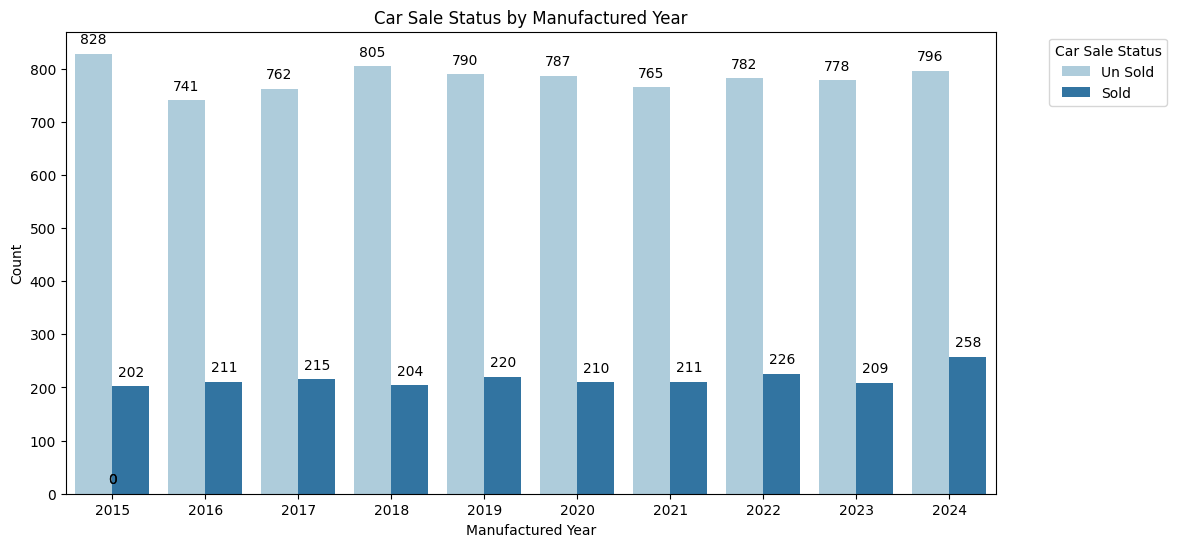

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Manufactured Year', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Manufactured Year')
plt.ylabel('Count')
plt.title('Car Sale Status by Manufactured Year')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Manufactured Year` 2015 have `Car Sale Status` Un Sold Highest and same `Manufactured Year` have lowest `Car Sale Status` with sold, `Manufactured Year` 2024 have highest `Car Sale Status` Sold highest.

C:\Users\amris\AppData\Local\Temp\ipykernel_8768\1066965346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Car Sale Status', y='Price-$', data=df, palette='Set2')


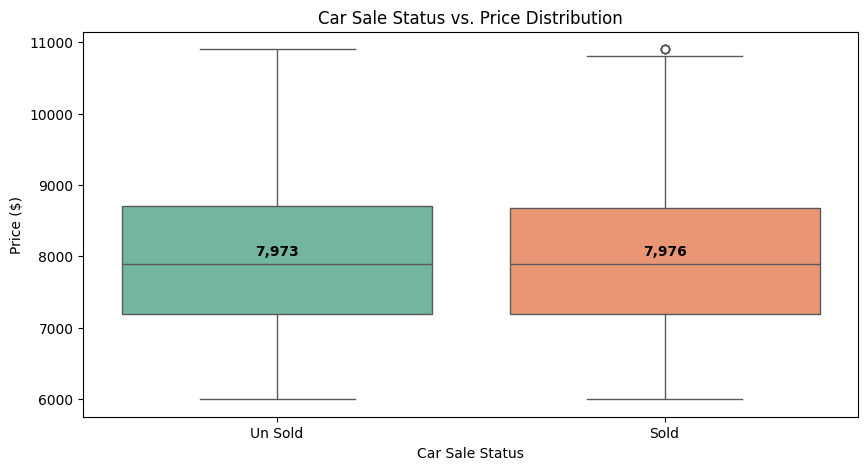

In [39]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Car Sale Status', y='Price-$', data=df, palette='Set2')

means_price = df.groupby('Car Sale Status')['Price-$'].mean()

for i, mean in enumerate(means_price):
    ax.text(i, mean, f'{mean:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.xlabel('Car Sale Status')
plt.ylabel('Price ($)')
plt.title('Car Sale Status vs. Price Distribution')

plt.show()

Insight: `Price-$` with `Car Sale Status` Sold have mean higher than `Car Sale Status` Un Sold, and `Car Sale Status` Sold have outlier `Price-$`

C:\Users\amris\AppData\Local\Temp\ipykernel_8768\3523482160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Car Sale Status', y='Mileage-KM', data=df, palette='Set2')


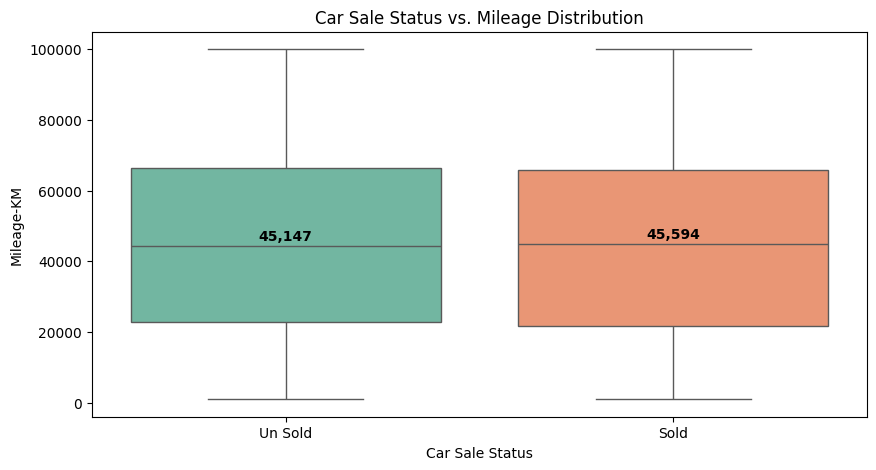

In [41]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Car Sale Status', y='Mileage-KM', data=df, palette='Set2')

means_price = df.groupby('Car Sale Status')['Mileage-KM'].mean()

for i, mean in enumerate(means_price):
    ax.text(i, mean, f'{mean:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.xlabel('Car Sale Status')
plt.ylabel('Mileage-KM')
plt.title('Car Sale Status vs. Mileage Distribution')

plt.show()

Insight: `Car Sale Status` Sold have mean higher `Mileage-KM` than other

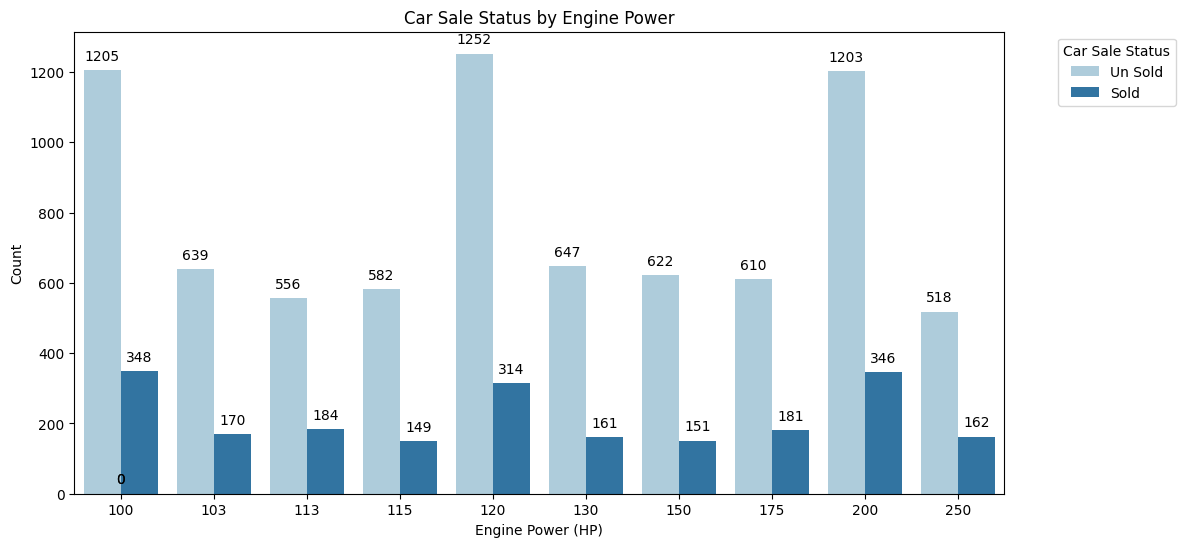

In [42]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Engine Power-HP', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Engine Power (HP)')
plt.ylabel('Count')
plt.title('Car Sale Status by Engine Power')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Engine Power-HP` 100 have `Car Sale Status` Sold Highest than others, `Engine Power-HP`115 have `Car Sale Status` Lowest than others, `Engine Power-HP`120 have `Car Sale Status` Un Sold highest than others, `Engine Power-HP` 250 have `Car Sale Status` lowest than others 

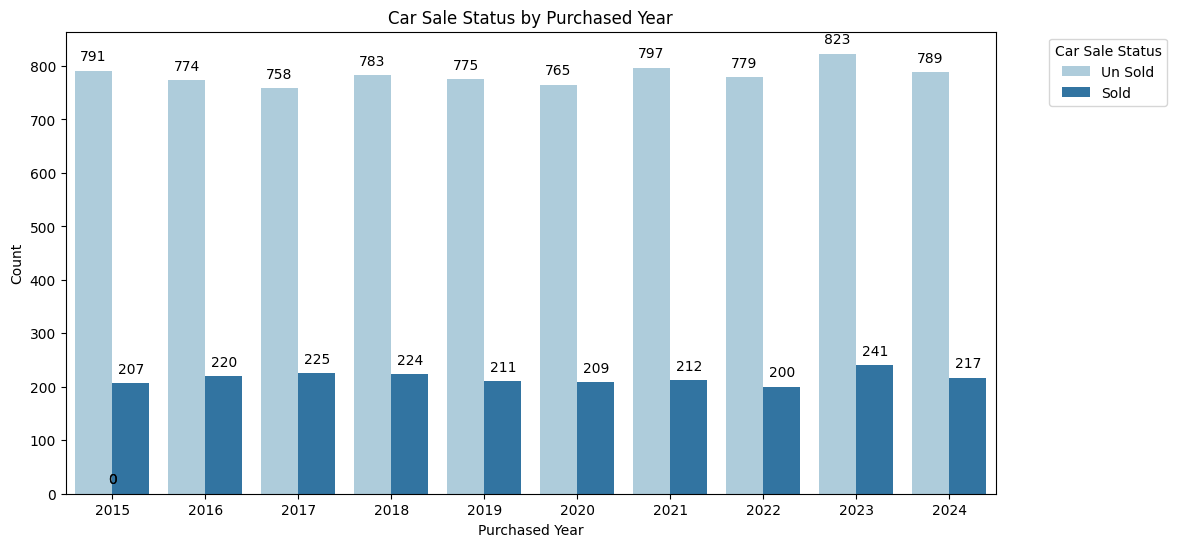

In [43]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Purchased Year', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Purchased Year')
plt.ylabel('Count')
plt.title('Car Sale Status by Purchased Year')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Purchased Year` 2023 have highest `Car Sale Status` Sold than others and same `Purchased Year` have `Car Sale Status` Un Sold Highest, `Purchased Year` 2022 have `Car Sale Status` Sold Lowest than others, `Purchased Year` 2017 have lowest `Car Sale Status` Un Sold lowest than other

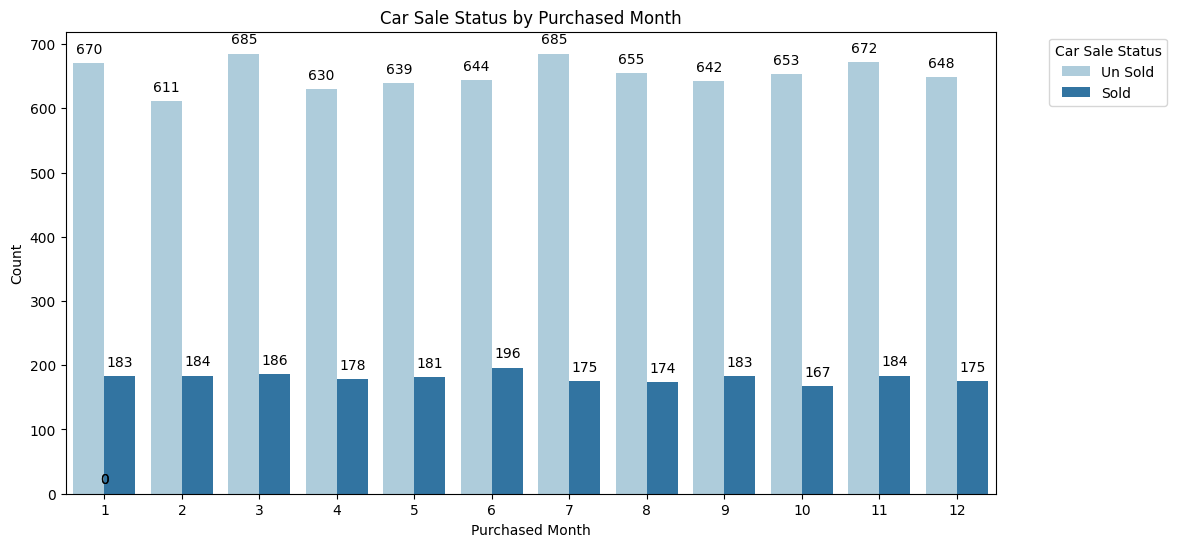

In [44]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Purchased Month', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Purchased Month')
plt.ylabel('Count')
plt.title('Car Sale Status by Purchased Month')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Purchased Month` 6 have highest `Car Sale Status` Sold than other, `Purchases Month` 10 have lowes `Car Sale Status` Sold than other, `Purchased Month` 2  have lowest `Car Sale Status` Un Sold, `Purchased Month` 3 and 7 have highest `Car Sale Status` Un Sold 

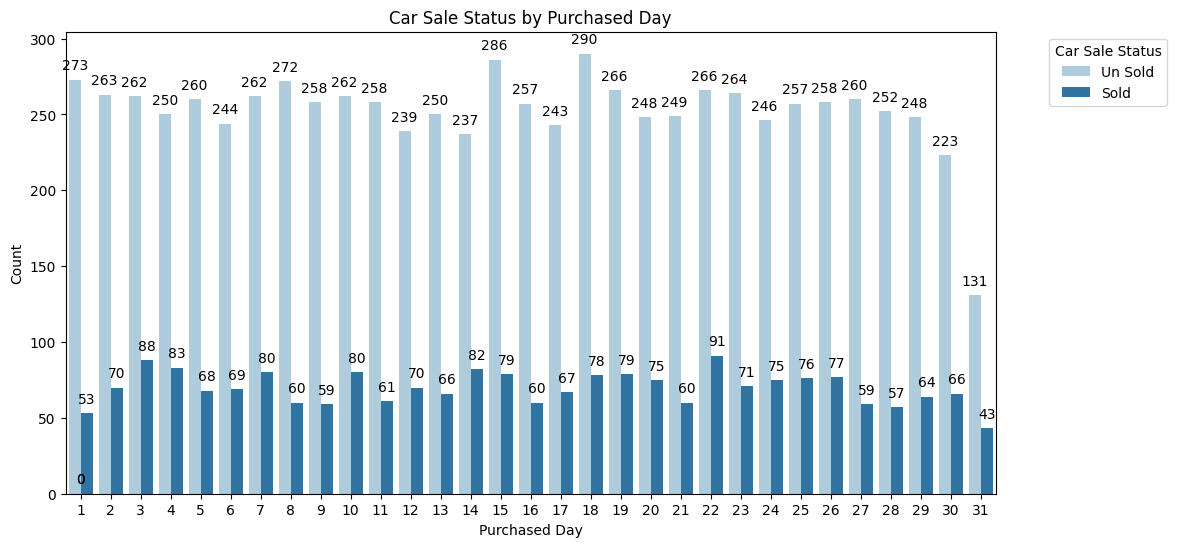

In [45]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Purchased Day', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Purchased Day')
plt.ylabel('Count')
plt.title('Car Sale Status by Purchased Day')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Purcahsed Day` 22 have `Car Sale Status` highest than other, `Purchased Day` 18 have highest `Car Sale Status` Un Sold, `Purchased Day` 31 have lowest `Car Sale Status` Sold, at the same `Car Sale Status` Un Sold is lowest than other

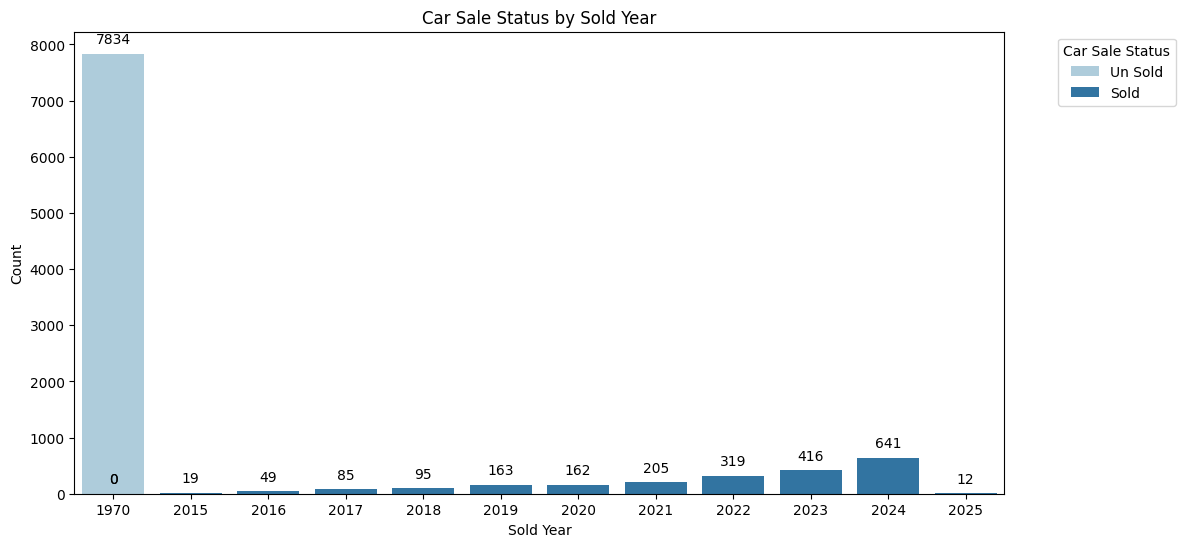

In [46]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sold Year', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Sold Year')
plt.ylabel('Count')
plt.title('Car Sale Status by Sold Year')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: any trend high `Car Sale Status` Sold from `Sold Year` 2015 to 2024

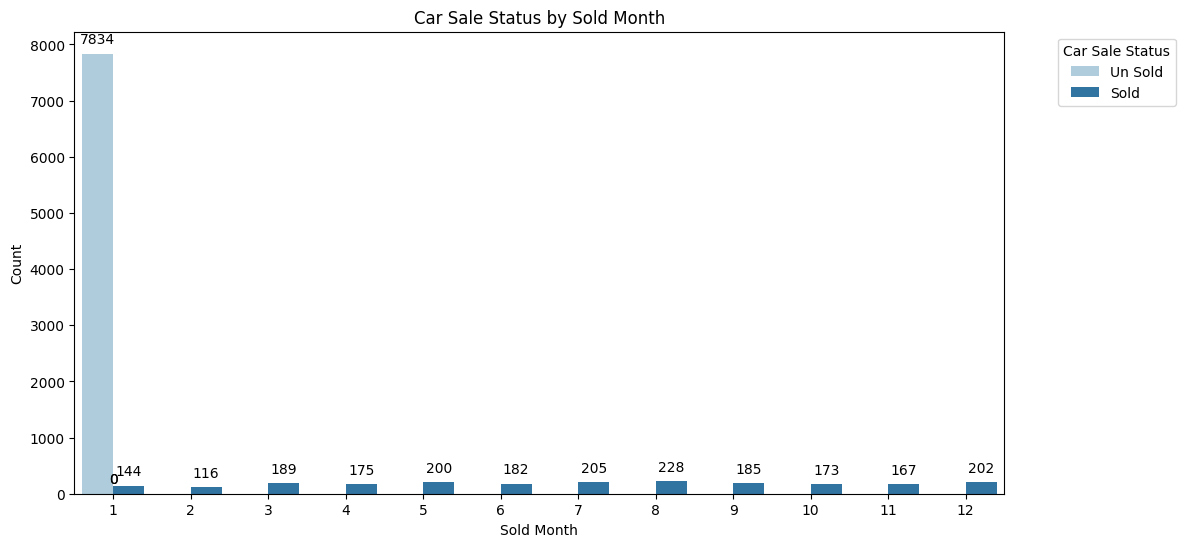

In [47]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sold Month', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Sold Month')
plt.ylabel('Count')
plt.title('Car Sale Status by Sold Month')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Sold Month` 8 have highest `Car Sale Status` Sold

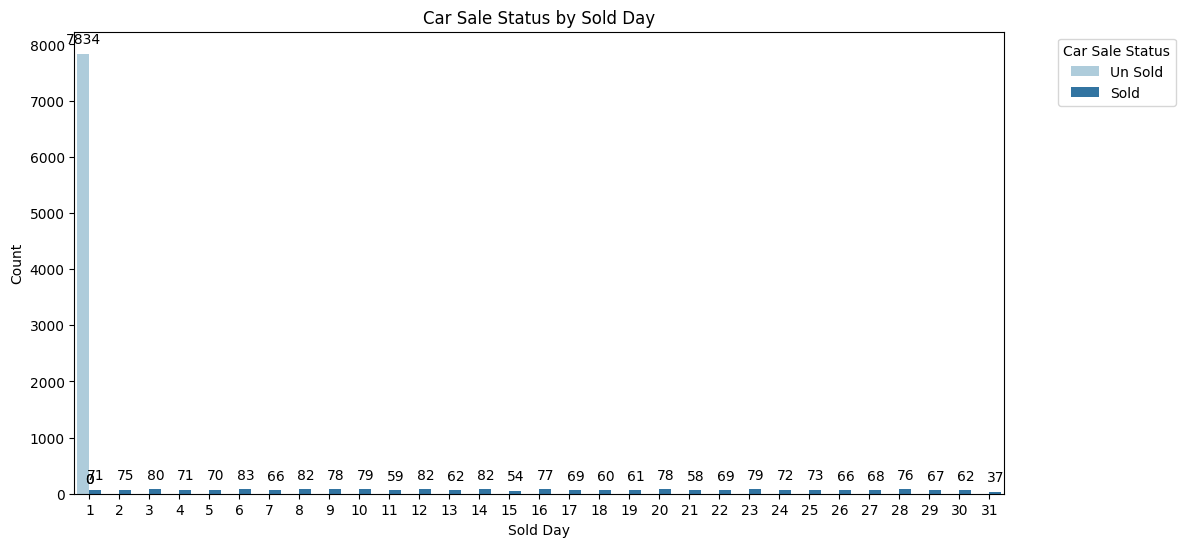

In [48]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sold Day', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Sold Day')
plt.ylabel('Count')
plt.title('Car Sale Status by Sold Day')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Sold Day` 6 have highest `Car Sale Status` Sold

C:\Users\amris\AppData\Local\Temp\ipykernel_8768\2336155791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Car Sale Status', y='Purchased Price-$', data=df, palette='Set2')


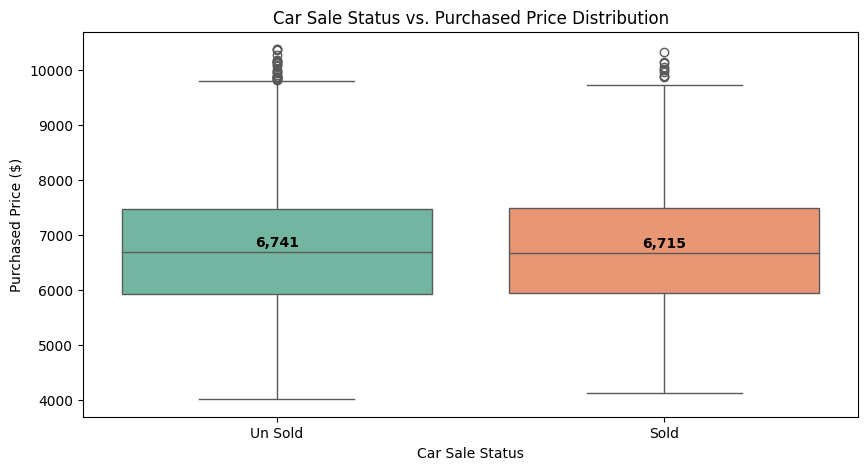

In [49]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Car Sale Status', y='Purchased Price-$', data=df, palette='Set2')

means_purch = df.groupby('Car Sale Status')['Purchased Price-$'].mean()

for i, mean in enumerate(means_purch):
    ax.text(i, mean, f'{mean:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.xlabel('Car Sale Status')
plt.ylabel('Purchased Price ($)')
plt.title('Car Sale Status vs. Purchased Price Distribution')

plt.show()

Insight: `Car Sale Status` Un Sold have mean highest `Purchsed Price-$`, and `Car Sale Status` Sold and Un Sold have outliers

C:\Users\amris\AppData\Local\Temp\ipykernel_8768\1578921146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Car Sale Status', y='Sold Price-$', data=df, palette='Set2')


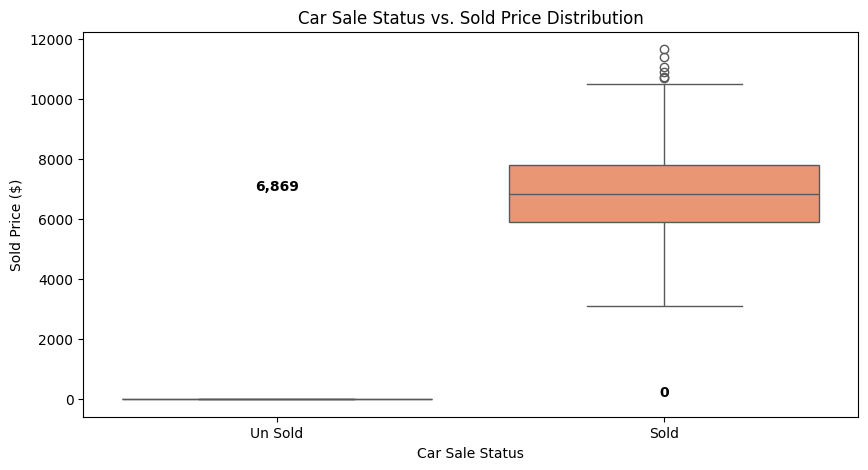

In [50]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Car Sale Status', y='Sold Price-$', data=df, palette='Set2')

means_purch = df.groupby('Car Sale Status')['Sold Price-$'].mean()

for i, mean in enumerate(means_purch):
    ax.text(i, mean, f'{mean:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.xlabel('Car Sale Status')
plt.ylabel('Sold Price ($)')
plt.title('Car Sale Status vs. Sold Price Distribution')

plt.show()

Insight: `Sold Price-$` Sold is 6869

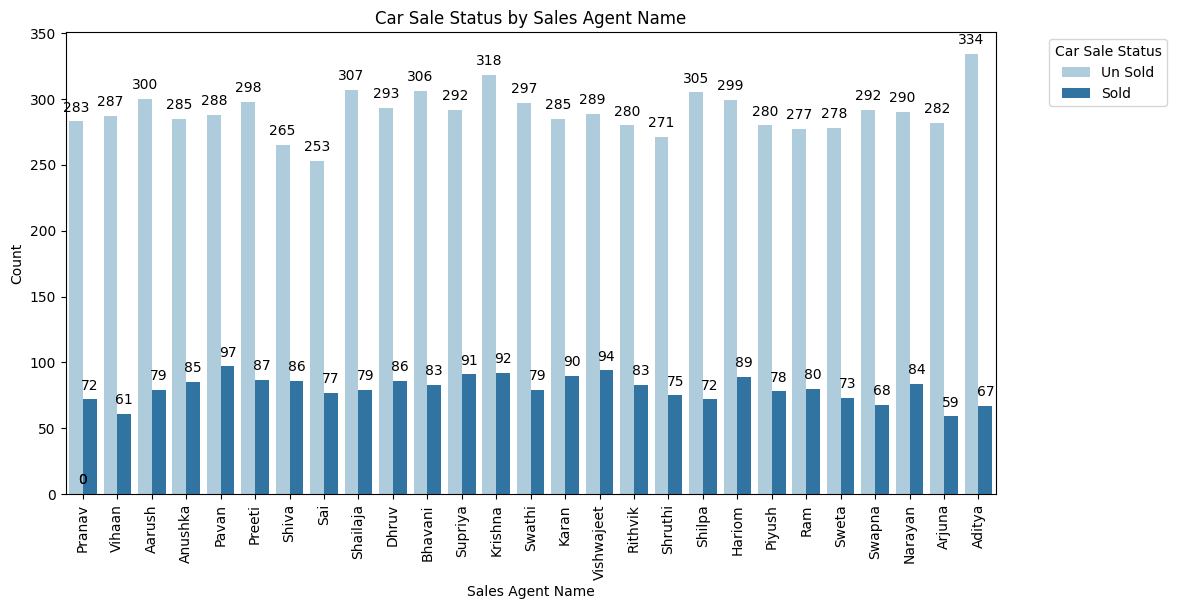

In [53]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sales Agent Name', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=90)
plt.xlabel('Sales Agent Name')
plt.ylabel('Count')
plt.title('Car Sale Status by Sales Agent Name')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Sales Agent Name` Pavan have `Car Sale Status` Sold highest, `Sales Agent Name` Krishna have Highest `Car Sale Status` Un Sold, `Sales Agent Name` Arjuna have lowest `Car Sale Status` Sold, `Sales Agent Name` Sai have lowest `Car Sale Status` un Sold  

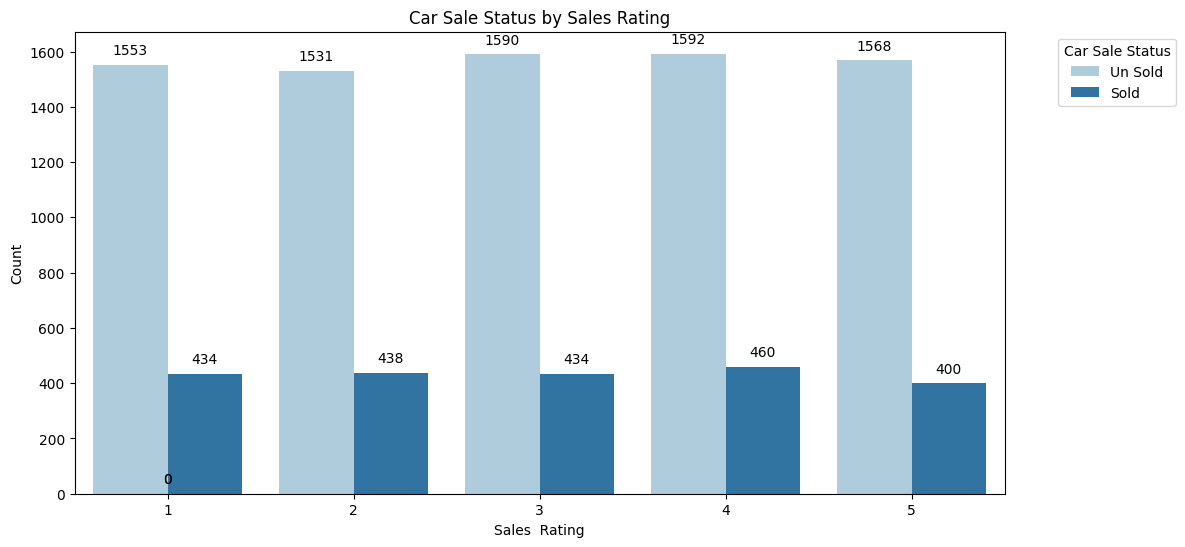

In [55]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Sales Rating', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Sales  Rating')
plt.ylabel('Count')
plt.title('Car Sale Status by Sales Rating')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Sales Ratung` 4 have highest `Car Sale Status` sold and un sold, `Sales Rating` 5 have lowest `Car Sale Status` sold, `Car Sale Status` 2 have lowest `Car Sale Status` un Sold

C:\Users\amris\AppData\Local\Temp\ipykernel_8768\2273127762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Car Sale Status', y='Sales Commission-$', data=df, palette='Set2')


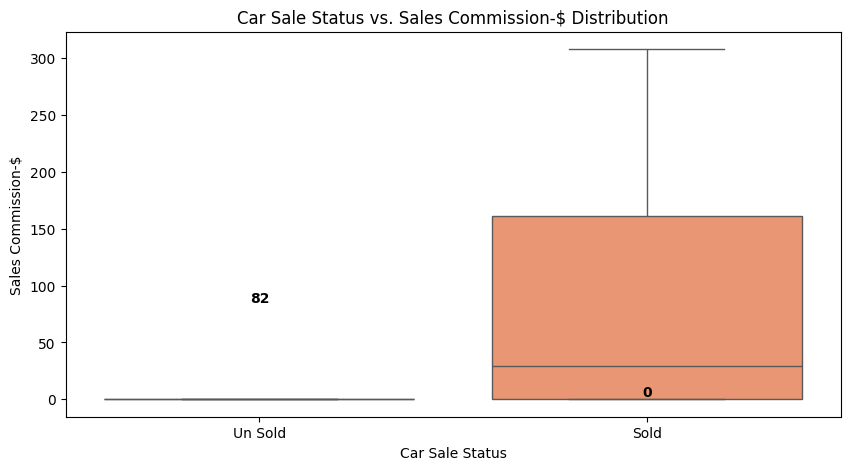

In [56]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Car Sale Status', y='Sales Commission-$', data=df, palette='Set2')

means_purch = df.groupby('Car Sale Status')['Sales Commission-$'].mean()

for i, mean in enumerate(means_purch):
    ax.text(i, mean, f'{mean:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.xlabel('Car Sale Status')
plt.ylabel('Sales Commission-$')
plt.title('Car Sale Status vs. Sales Commission-$ Distribution')

plt.show()

Insight: Mean `Sales Commission-$` is 82

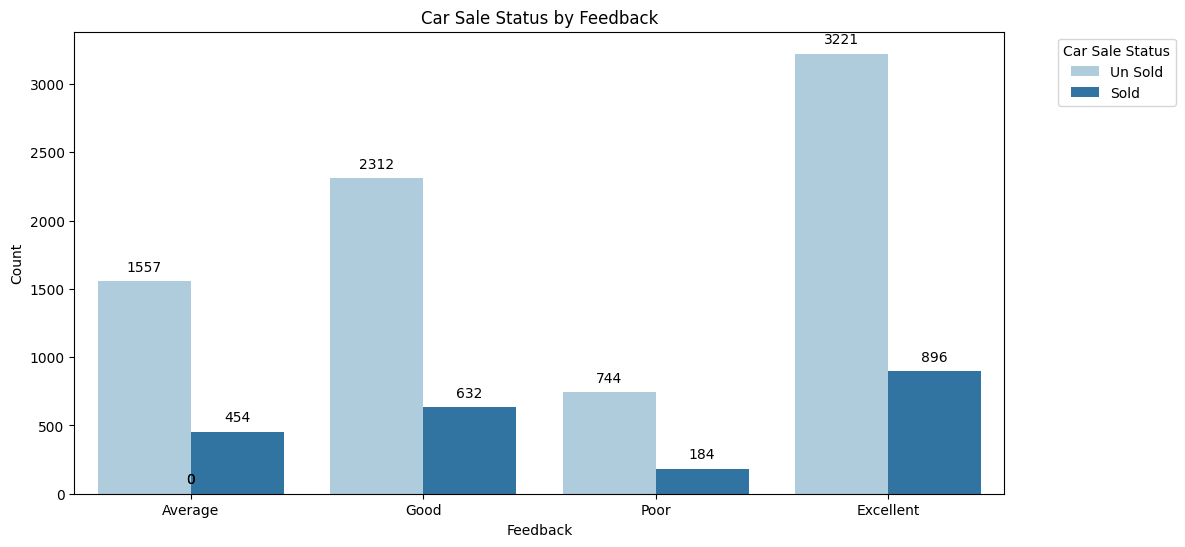

In [57]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Feedback', hue='Car Sale Status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Car Sale Status by Feedback')
plt.legend(title='Car Sale Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: `Feedback` excellent have highest `Car Sale Status` for Sold and Un Sold, `Feedback` Poor have lowest `Car Sale Status` for sold and un sold

## Encoding

Change type data object to label encoder, because model only use if type data numeric and check duplicated data

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
label_encoder_cols = ['Gearbox']
encoder = LabelEncoder()
for col in label_encoder_cols:
    df[col] = encoder.fit_transform(df[col])

exclude_cols = ['ID'] + label_encoder_cols
for col in df.columns:
    if df[col].dtype == 'object' and col not in exclude_cols:
        df[col] = df[col].astype('category').cat.codes

## Feature Engineering

Feature Engineering: Transforming raw data into powerful insights! 🚀✨ The right features can make all the difference in model performance. From scaling and encoding to creating new variables, every step brings us closer to better predictions

In [8]:
df['Price per HP'] = df['Price-$'] / df['Engine Power-HP']
df['Price per KM'] = df['Price-$'] / df['Mileage-KM']
df['Car Age at Purchase'] = df['Purchased Year'] - df['Manufactured Year']
df['Car Age at Sale'] = df['Sold Year'] - df['Manufactured Year']
df['Sales Commission per KM'] = df['Sales Commission-$'] / df['Mileage-KM']
df['Sales Commission per HP'] = df['Sales Commission-$'] / df['Engine Power-HP']
df['Sales Commission per Price'] = df['Sales Commission-$'] / df['Price-$']
df['Margin per KM'] = df['Margin-%'] / df['Mileage-KM']
df['Margin per HP'] = df['Margin-%'] / df['Engine Power-HP']
df['Margin per Price'] = df['Margin-%'] / df['Price-$']
df['Price per KM per HP'] = df['Price-$'] / df['Mileage-KM'] / df['Engine Power-HP']
df['Price per KM per Price'] = df['Price-$'] / df['Mileage-KM'] / df['Price-$']
df['Price per HP per Price'] = df['Price-$'] / df['Engine Power-HP'] / df['Price-$']
df['Price per KM per Price'] = df['Price-$'] / df['Mileage-KM'] / df['Price-$']
df['Old Car Purchase'] = (df['Car Age at Purchase'] > 5).astype(int)
df['Old Car Sale'] = (df['Car Age at Sale'] > 5).astype(int)
df['Avg Sales Rating'] = df.groupby('Sales Agent Name')['Sales Rating'].transform('mean')
df['Total Sales by Agent'] = df.groupby('Sales Agent Name')['ID'].transform('count')
df['Avg Sales Commission by Agent'] = df.groupby('Sales Agent Name')['Sales Commission-$'].transform('mean')
df['Avg Sales Commission by Distributor'] = df.groupby('Distributor Name')['Sales Commission-$'].transform('mean')
df['Avg Sales Commission by Manufacturer'] = df.groupby('Manufacturer Name')['Sales Commission-$'].transform('mean')
df['Avg Sales Commission by Car Type'] = df.groupby('Car Type')['Sales Commission-$'].transform('mean')
df['Avg Sales Commission by Color'] = df.groupby('Color')['Sales Commission-$'].transform('mean')
df['Avg Sales Commission by Gearbox'] = df.groupby('Gearbox')['Sales Commission-$'].transform('mean')

## Preparation Data

In [9]:
df_clean = df.drop(columns=df.select_dtypes(include=['object', 'datetime64[ns]', 'period[M]']).columns)

## Train-Test Split

Separate target and feature

In [10]:
x = df_clean.drop(['Car Sale Status'], axis=1)
y = df_clean['Car Sale Status']

In [11]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

## K-Fold Cross Validation

K-Fold is used to divide the dataset into folds.

In [12]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

## Modeling

Stacking Ensemble: Combining Multiple Strong Learners for Improved Classification Performance

In [13]:
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('ab', AdaBoostClassifier(n_estimators=50, random_state=42))
]

In [14]:
stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=RandomForestClassifier(n_estimators=500, random_state=42),
    cv=3
)

In [16]:
stacking.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=42)),
                               ('ab', AdaBoostClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=500,
                                                          random_state=42))

In [17]:
y_pred_stacking = stacking.predict(x_val)
print("Accuracy (Stacking with Random Forest Final Estimator):", accuracy_score(y_val, y_pred_stacking))

Accuracy (Stacking with Random Forest Final Estimator): 1.0


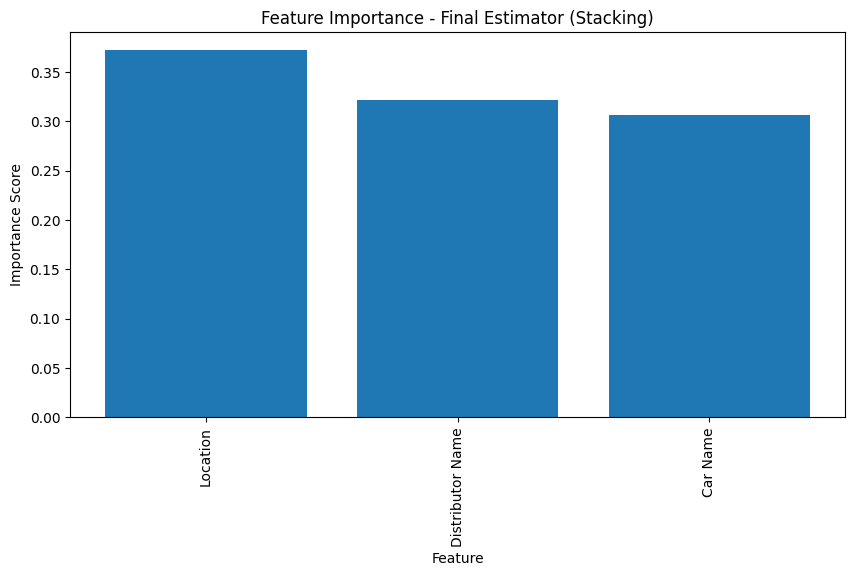

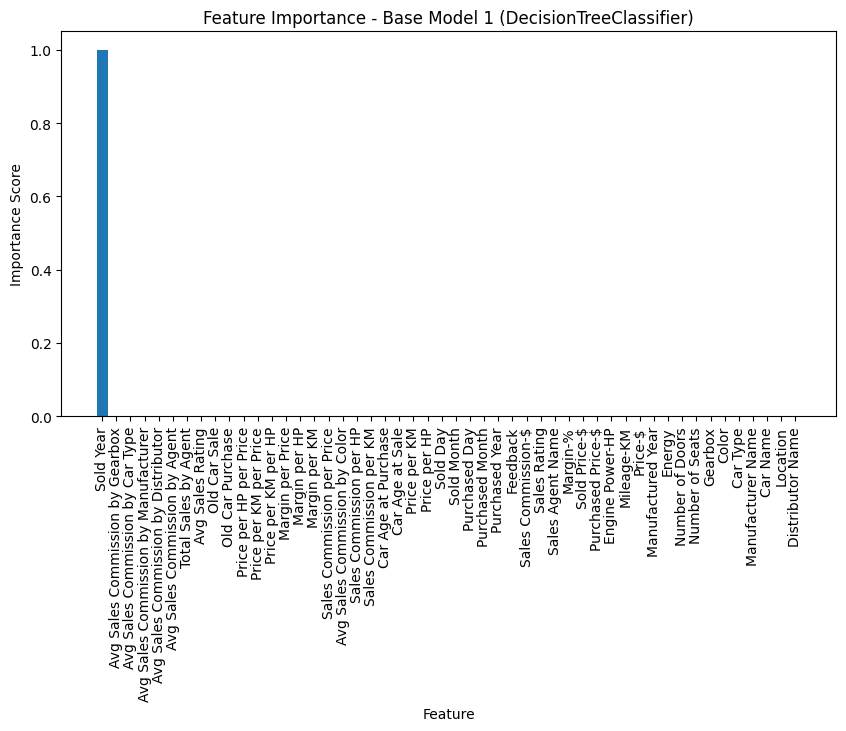

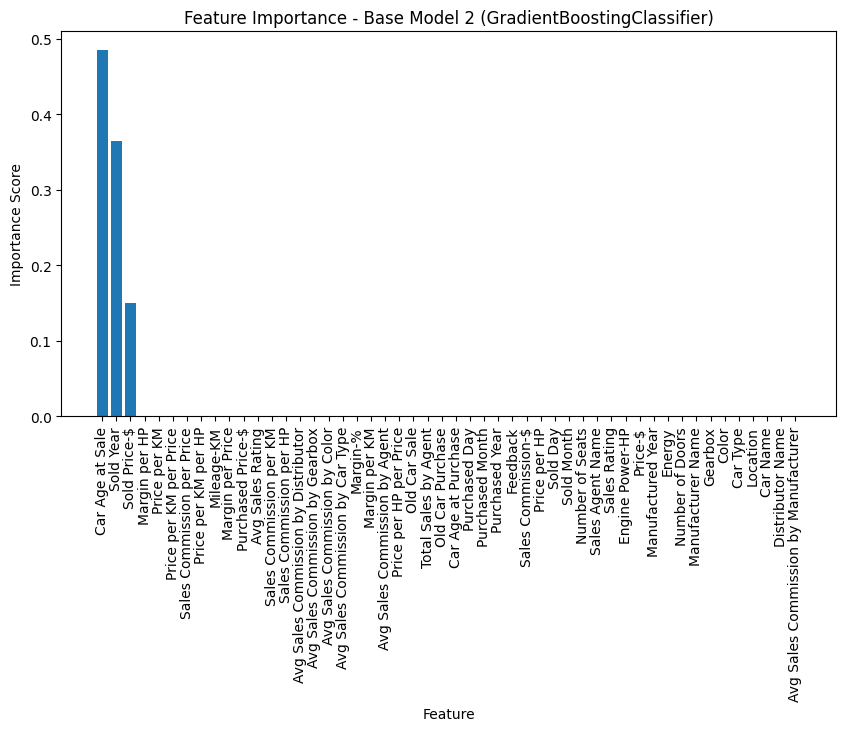

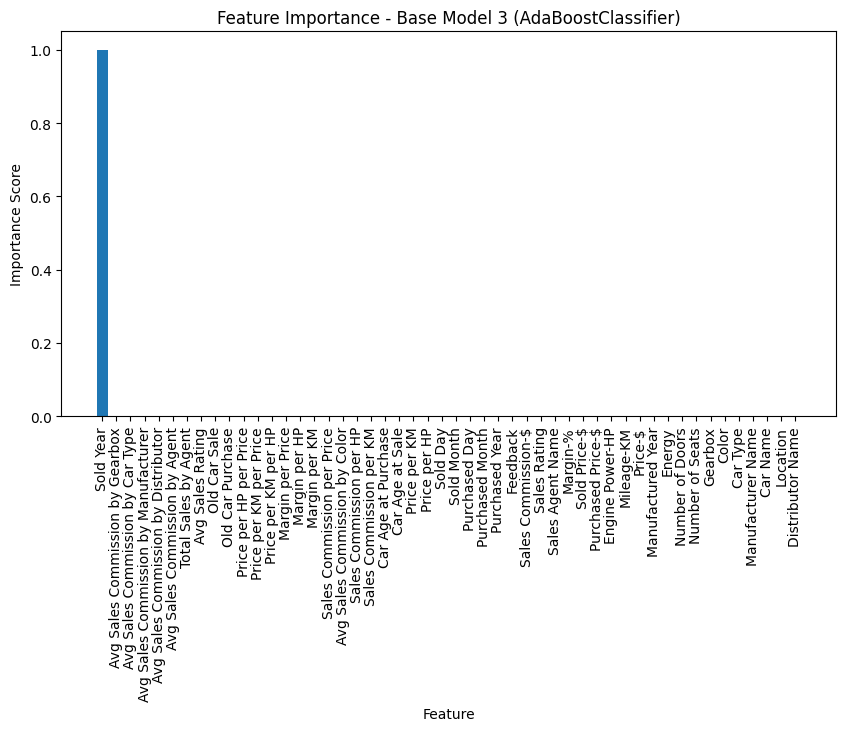

In [71]:
base_learners = stacking.estimators_  
final_estimator = stacking.final_estimator_ 

models = {"Final Estimator (Stacking)": final_estimator}
models.update({f"Base Model {i+1} ({type(model).__name__})": model for i, model in enumerate(base_learners)})

for model_name, model in models.items():
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
        feature_names = x_val.columns

        sorted_idx = np.argsort(feature_importance)[::-1]

        plt.figure(figsize=(10, 5))
        plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
        plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
        plt.xlabel("Feature")
        plt.ylabel("Importance Score")
        plt.title(f"Feature Importance - {model_name}")
        plt.show()
    else:
        print(f"{model_name} No have feature_importances_")

Insight: Feature Importance stacking is `Location`, `Distributor Name` and `Car Name`

  Feature  Importance
1      gb       0.372
0      dt       0.322
2      ab       0.306


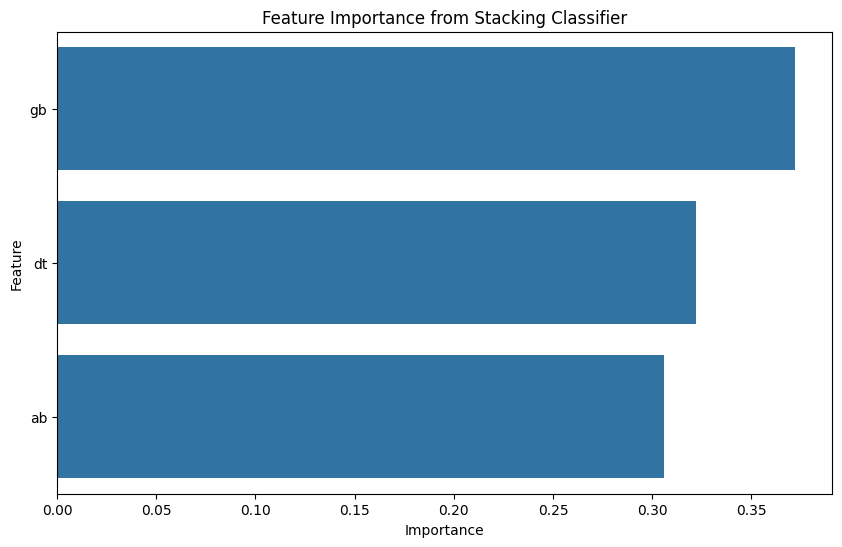

In [72]:
importances = stacking.final_estimator_.feature_importances_
feature_names = [est[0] for est in base_models]

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)
# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Stacking Classifier')
plt.show()

Insight: `GradientBoosting` have feature importance highest

## Evaluation

Confusion Matrix:
[[ 702    0]
 [   0 2631]]


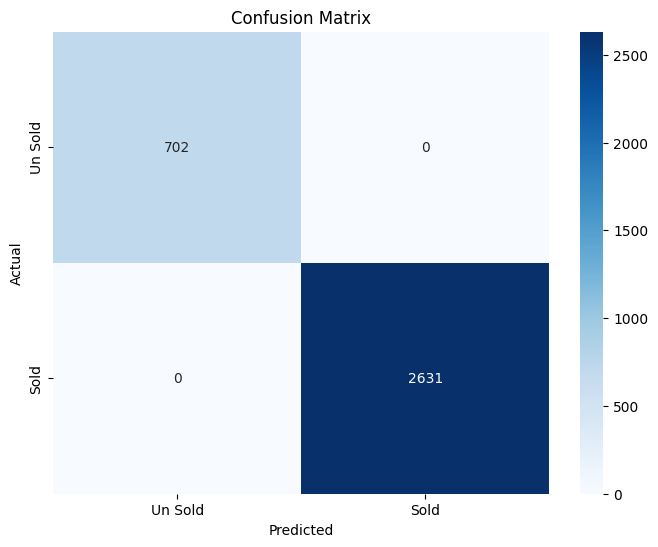

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00      2631

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



In [18]:
# Predict on the validation set using the best estimator from GridSearchCV
y_pred_stacking = stacking.predict(x_val)

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred_stacking)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Un Sold', 'Sold'],
            yticklabels=['Un Sold', 'Sold'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, y_pred_stacking))

Insight: Accuracy model is 100%, so Actual label and predict label have perfect prediction, no more different

## Conclusion



`Sold Year` in this data begin in 2015, Feature Importance stacking is `Location`, `Distributor Name` and `Car Name`, Accuracy model is 100%, so Actual label and predict label have perfect prediction, no more different

## Reference 

1. https://www.kaggle.com/datasets/sandeep1080/used-car-sales?resource=download

2. https://www.analyticsvidhya.com/

3. https://xbe.at/